理解が甘いのでブラックボックス状態ですが、慣れる意味でコーディング

10種類の衣類などの画像を読み込み、分類
ニューラルネットワークのモデル

In [ ]:
import tensorflow
from tensorflow import keras

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
batch_size = 128
num_class = 10
epochs = 10

In [4]:
(trainx, trainy), (testx, testy) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
len(trainx)

60000

In [6]:
keras.backend.image_data_format()

'channels_last'

In [7]:
trainx = trainx.reshape(trainx.shape[0], 28, 28, 1)
testx = testx.reshape(testx.shape[0], 28, 28, 1)

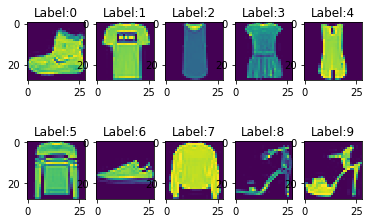

In [8]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label:" + str(i))
    plt.imshow(trainx[i].reshape(28, 28))

In [9]:
trainx, testx = trainx / 255.0, testx / 255.0

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                       activation="relu",
                       input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class, activation="softmax")
    
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
以下の処理がいまのPCでは追い付かなかったので途中でストップ

In [14]:
model.fit(trainx, trainy, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.4772 - acc: 0.8331
Epoch 2/20
45600/60000 [=====================>........] - ETA: 15s - loss: 0.3228 - acc: 0.8852

KeyboardInterrupt: 